<a href="https://colab.research.google.com/github/vivekdubey74vv/AI-Mental-Fitness-Tracker.74vv/blob/main/Sunbase_customer_churn_data_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [427]:
data=pd.read_csv("/content/customer_churn_large_dataset.csv")

In [428]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [429]:
data.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [430]:
data.shape
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 100000
Number of Columns 9


In [431]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [432]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


#checking missing data

In [433]:
headers = ["CustomerID","Name","Age","Gender","Location","Subscription_Length_Months","Monthly_Bill","Total_Usage_GB","Churn"]

In [434]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [435]:
missing_data = data.isnull()
for column in headers :
  print(column)
  print(missing_data[column].value_counts())
  print(" ")


CustomerID
False    100000
Name: CustomerID, dtype: int64
 
Name
False    100000
Name: Name, dtype: int64
 
Age
False    100000
Name: Age, dtype: int64
 
Gender
False    100000
Name: Gender, dtype: int64
 
Location
False    100000
Name: Location, dtype: int64
 
Subscription_Length_Months
False    100000
Name: Subscription_Length_Months, dtype: int64
 
Monthly_Bill
False    100000
Name: Monthly_Bill, dtype: int64
 
Total_Usage_GB
False    100000
Name: Total_Usage_GB, dtype: int64
 
Churn
False    100000
Name: Churn, dtype: int64
 


#Dropping Irrelevent Features

In [436]:
data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [437]:
data = data.drop(['CustomerID', 'Name'],axis=1)

In [438]:
data.head(10)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
5,67,Male,New York,15,82.65,456,1
6,30,Female,Chicago,3,73.79,269,0
7,67,Female,Miami,1,97.70,396,1
8,20,Female,Miami,10,42.45,150,1
9,53,Female,Los Angeles,12,64.49,383,1


#Encoding Categorical Data

In [439]:
data['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [440]:
data = pd.get_dummies(data, drop_first=True)

In [441]:
data.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0


#Not Handling imbalanced

In [442]:
data['Churn'].value_counts()


0    50221
1    49779
Name: Churn, dtype: int64

In [443]:
import seaborn as sns

In [ ]:
sns.pairplot(data, hue='Churn')
plt.show()

<Axes: ylabel='count'>

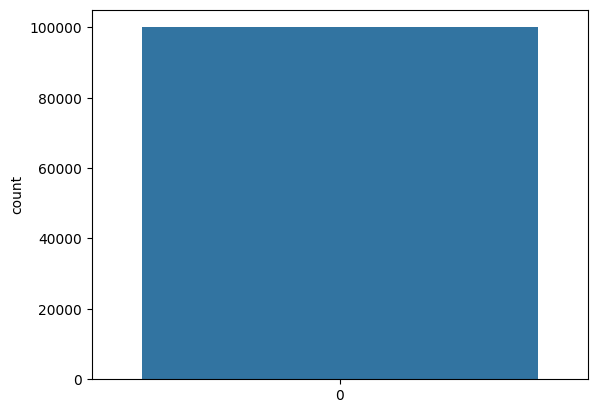

In [478]:
sns.countplot(data['Churn'])

#Diving into Target and Predictor Variables

In [446]:
X= data.drop('Churn',axis=1)
y=data['Churn']

In [447]:
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

#Handling Imbalanced Data With SMOTE

In [448]:
from imblearn.over_sampling import SMOTE

In [449]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [450]:
y_res.value_counts()

0    50221
1    50221
Name: Churn, dtype: int64

In [451]:
from collections import Counter
print('original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape{}'.format(Counter(y_res)))

original dataset shape Counter({0: 50221, 1: 49779})
Resampled dataset shapeCounter({0: 50221, 1: 50221})


#Divide Data as Training Set and Testing Set

In [480]:
from sklearn.model_selection import train_test_split

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,test_size= 0.20,random_state= 46)


In [454]:
X_train

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
67665,62,19,49.48,466,0,1,0,0,0
65564,36,3,81.75,381,1,0,1,0,0
52159,52,7,83.18,101,1,0,0,1,0
39494,62,23,91.43,114,0,1,0,0,0
51526,18,10,30.89,423,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
84410,56,20,42.91,130,1,0,0,0,0
56692,27,18,47.15,315,0,0,1,0,0
30248,69,23,74.57,464,1,0,0,0,0
88901,44,7,85.85,376,1,0,1,0,0


In [455]:
X_test

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
42508,60,12,42.04,51,0,0,0,0,0
49541,39,21,77.67,456,0,0,0,1,0
70673,25,9,94.84,315,0,0,0,0,1
70424,28,19,71.24,273,1,0,0,1,0
34843,38,8,44.21,298,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
76177,69,7,39.62,345,1,0,1,0,0
86183,54,3,33.33,193,1,0,0,0,1
29963,44,8,37.75,197,1,0,0,0,0
58207,20,1,63.43,106,0,1,0,0,0


In [456]:
y_train

67665    0
65564    1
52159    1
39494    1
51526    1
        ..
84410    0
56692    1
30248    0
88901    0
81085    0
Name: Churn, Length: 80353, dtype: int64

In [457]:
y_test

42508    0
49541    1
70673    1
70424    0
34843    0
        ..
76177    0
86183    0
29963    0
58207    0
19501    0
Name: Churn, Length: 20089, dtype: int64

#Feature Engineering


In [458]:
from sklearn.preprocessing import LabelEncoder

In [459]:
age_bins = [0, 30, 40, 50, 100]
age_labels = ['Young', 'Adult', 'Middle-aged', 'Senior']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)


In [460]:
data['Subscription_Length_Category'] = pd.cut(data['Subscription_Length_Months'], bins=[0, 6, 12, 24, 100], labels=['Short', 'Medium', 'Long', 'Very Long'])

In [461]:
data

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_Group,Subscription_Length_Category
0,63,17,73.36,236,0,1,0,1,0,0,Senior,Long
1,62,1,48.76,172,0,0,0,0,0,1,Senior,Short
2,24,5,85.47,460,0,0,0,1,0,0,Young,Short
3,36,3,97.94,297,1,0,0,0,1,0,Adult,Short
4,46,19,58.14,266,0,0,0,0,1,0,Middle-aged,Long
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33,23,55.13,226,1,1,1,0,0,0,Adult,Long
99996,62,19,61.65,351,0,0,0,0,0,1,Senior,Long
99997,64,17,96.11,251,1,1,0,0,0,0,Senior,Long
99998,51,20,49.25,434,1,0,0,0,0,1,Senior,Long


#Feature Scaling

In [462]:
from sklearn.preprocessing import StandardScaler

In [463]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [464]:
X_train

array([[ 1.17834719e+00,  9.37438190e-01, -7.69791232e-01, ...,
        -4.97439652e-01, -5.00688274e-01, -4.94128162e-01],
       [-5.25863760e-01, -1.37187720e+00,  8.26086176e-01, ...,
         2.01029411e+00, -5.00688274e-01, -4.94128162e-01],
       [ 5.22881441e-01, -7.94548349e-01,  8.96805255e-01, ...,
        -4.97439652e-01,  1.99725069e+00, -4.94128162e-01],
       ...,
       [ 1.63717322e+00,  1.51476704e+00,  4.71007162e-01, ...,
        -4.97439652e-01, -5.00688274e-01, -4.94128162e-01],
       [-1.49115950e-03, -7.94548349e-01,  1.02884717e+00, ...,
         2.01029411e+00, -5.00688274e-01, -4.94128162e-01],
       [ 1.17834719e+00,  1.65909925e+00,  4.35400352e-01, ...,
        -4.97439652e-01, -5.00688274e-01, -4.94128162e-01]])

In [465]:
X_test

array([[ 1.04725404e+00, -7.28872908e-02, -1.13772826e+00, ...,
        -4.97439652e-01, -5.00688274e-01, -4.94128162e-01],
       [-3.29224035e-01,  1.22610261e+00,  6.24314257e-01, ...,
        -4.97439652e-01,  1.99725069e+00, -4.94128162e-01],
       [-1.24687609e+00, -5.05883926e-01,  1.47343775e+00, ...,
        -4.97439652e-01, -5.00688274e-01,  2.02376646e+00],
       ...,
       [-1.49115950e-03, -6.50216137e-01, -1.34988550e+00, ...,
        -4.97439652e-01, -5.00688274e-01, -4.94128162e-01],
       [-1.57460896e+00, -1.66054162e+00, -7.99093033e-02, ...,
        -4.97439652e-01, -5.00688274e-01, -4.94128162e-01],
       [-1.05023636e+00, -1.66054162e+00,  6.96516953e-01, ...,
        -4.97439652e-01,  1.99725069e+00, -4.94128162e-01]])

##Logistic Regression

In [466]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


In [467]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred1 = log.predict(X_test)

In [468]:
accurac=accuracy_score(y_test,y_pred1)
precision=precision_score(y_test,y_pred1)
recall=recall_score(y_test,y_pred1)
f1=f1_score(y_test,y_pred1)

In [469]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.50
Precision: 0.51
Recall: 0.51
F1-score: 0.51


#SVC

In [471]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)

In [473]:
accuracy=accuracy_score(y_test,y_pred2)
precision=precision_score(y_test,y_pred2)
recall =recall_score(y_test, y_pred2)
f1 =f1_score(y_test, y_pred2)

In [474]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.50
Precision: 0.51
Recall: 0.49
F1-score: 0.50


#KNeighbors Classifier

In [475]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3 =knn.predict(X_test)

In [476]:
accuracy=accuracy_score(y_test,y_pred3)
precision=precision_score(y_test,y_pred3)
recall =recall_score(y_test, y_pred3)
f1 =f1_score(y_test, y_pred3)

In [477]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.50
Precision: 0.50
Recall: 0.50
F1-score: 0.50


#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred4 = dt.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred4)
precision=precision_score(y_test,y_pred4)
recall =recall_score(y_test, y_pred4)
f1 =f1_score(y_test, y_pred4)

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred5 = rf.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred5)
precision=precision_score(y_test,y_pred5)
recall =recall_score(y_test, y_pred5)
f1 =f1_score(y_test, y_pred5)

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

#Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred6 = gbc.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred6)
precision=precision_score(y_test,y_pred6)
recall =recall_score(y_test, y_pred6)
f1 =f1_score(y_test, y_pred6)

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

#Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import accuracy_score, precision_score
nn = MLPClassifier(random_state=42)
nn.fit(X_train, y_train)
y_pred7 = model.predict(X_test)



In [ ]:
accuracy = accuracy_score(y_test, y_pred7)
precision = precision_score(y_test, y_pred7)
recall =recall_score(y_test, y_pred7)
f1 =f1_score(y_test, y_pred7)


In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

In [483]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC','MLPC'],'ACC':[accuracy_score(y_test,y_pred1),
                                                                           accuracy_score(y_test,y_pred2),
                                                                           accuracy_score(y_test,y_pred3),
                                                                           accuracy_score(y_test,y_pred4),
                                                                           accuracy_score(y_test,y_pred5),
                                                                           accuracy_score(y_test,y_pred6),
                                                                           accuracy_score(y_test,y_pred7)]})

In [484]:
final_data

,Models,ACC
0,LR,0.507143
1,SVC,0.504654
2,KNN,0.499228
3,DT,0.500274
4,RF,0.503659
5,GBC,0.499278
6,MLPC,0.998855


In [485]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

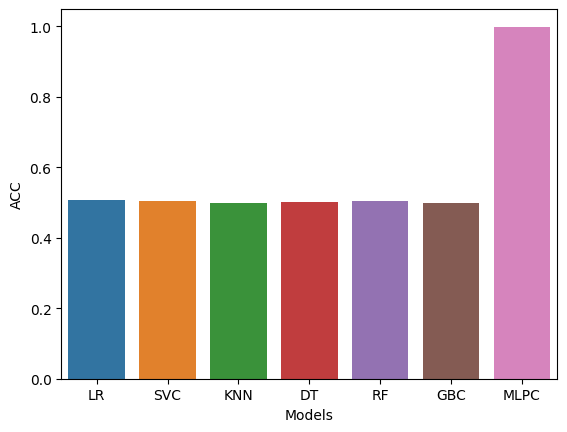

In [486]:
sns.barplot(x='Models', y='ACC', data=final_data)

In [487]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC','MLPC'],'PRE':[precision_score(y_test,y_pred1),
                                                                           precision_score(y_test,y_pred2),
                                                                           precision_score(y_test,y_pred3),
                                                                           precision_score(y_test,y_pred4),
                                                                           precision_score(y_test,y_pred5),
                                                                           precision_score(y_test,y_pred6),
                                                                            precision_score(y_test,y_pred7)]})

<Axes: xlabel='Models', ylabel='PRE'>

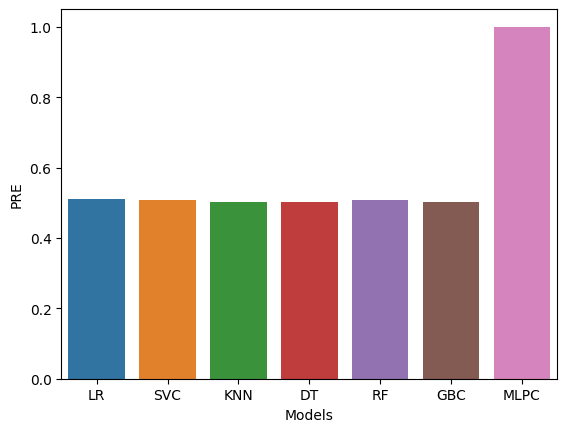

In [488]:
sns.barplot(x='Models', y='PRE', data=final_data)

#Save The Model

In [490]:
X_res = sc.fit_transform(X_res)
nn.fit(X_res,y_res)

MLPClassifier(random_state=42)

In [492]:
import joblib

In [493]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [494]:
model = joblib.load('churn_predict_model')

In [495]:
data.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn', 'Gender_Male', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York', 'Age_Group',
       'Subscription_Length_Category'],
      dtype='object')

In [496]:
model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 1])

#GUI

In [ ]:
!pip install -q gradio

In [497]:
import gradio as gr
import joblib
import pandas as pd
import numpy as np

model = joblib.load('/content/churn_predict_model')

def predict_churn(age, subscription_months, monthly_bill, total_usage_gb):

    input_data = pd.DataFrame({
        'Age': [age],
        'Gender':[gender],
        'Location':[location],
        'Subscription_Length_Months': [subscription_months],
        'Monthly_Bill': [monthly_bill],
        'Total_Usage_GB': [total_usage_gb],
    })

    prediction = model.predict(input_data)

    return 'Churned' if prediction[0] == 1 else 'Not Churned'
iface = gr.Interface(
    fn=predict_churn,
    inputs=[
        gr.inputs.Number(label="Age"),
        gr.inputs.Number(label="Gender"),
        gr.inputs.Number(label="Location"),
        gr.inputs.Number(label="Subscription Months"),
        gr.inputs.Number(label="Monthly Bill"),
        gr.inputs.Number(label="Total Usage (GB)"),
    ],
    outputs=gr.outputs.Textbox(label="Churn Prediction"),
    title="Customer Churn Prediction",
)

iface.launch()


<ipython-input-497-65c4bbb9d77c>:31: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Number(label="Age"),
<ipython-input-497-65c4bbb9d77c>:31: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Number(label="Age"),
<ipython-input-497-65c4bbb9d77c>:32: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Number(label="Gender"),
<ipython-input-497-65c4bbb9d77c>:32: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Number(label="Gender"),
<ipython-input-497-65c4bbb9d77c>:33: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Number(label="Location"),
<i

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>